In [2]:
import numpy as np
import pandas as pd

import os
import sys
from pathlib import Path
sys.path.append('../src')

In [4]:
Path.cwd()

PosixPath('/Users/cris/Iron/reto_data')

In [12]:
dataframe_csv = pd.read_csv('data-inputs/measurements.csv')
dataframe_xlxs = pd.read_excel('data-inputs/measurements2.xlsx', engine='openpyxl')

In [13]:
dataframe_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [14]:
dataframe_xlxs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [15]:
dataframe_csv.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [16]:
dataframe_xlxs.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [22]:
duplicate = dataframe_xlxs[dataframe_xlxs.duplicated()]  # valores nulos

In [40]:
df = dataframe_xlxs.copy()

In [41]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [42]:
df = df.rename(columns ={'temp_inside':'t_in', 'temp_outside':'t_out','specials':'spexs', 'gas_type':'gas','AC':'ac','refill liters':'ref_lts', 'refill gas':'ref_gas'})

In [43]:
df.columns

Index(['distance', 'consume', 'speed', 't_in', 't_out', 'spexs', 'gas', 'ac',
       'rain', 'sun', 'ref_lts', 'ref_gas'],
      dtype='object')

In [46]:
df.spexs.value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
sun ac                 3
snow                   3
AC sun                 1
AC snow                1
half rain half sun     1
AC Sun                 1
ac rain                1
Name: spexs, dtype: int64

In [ ]:

df3.attack = df3['attack'].replace(['Unprovoked attacks','Provoked attacks','Boat attacks','Not confirmed','NaN','Doubtful','Scavenge','Public aquaria'],['Unprovoked','Provoked','Watercraft','Unconfirmed','Invalid','Questionable','Questionable','Questionable'])

In [47]:
df.ref_lts.value_counts()

45.0    2
39.0    2
37.7    2
10.0    1
38.0    1
38.3    1
37.2    1
41.0    1
37.6    1
37.0    1
Name: ref_lts, dtype: int64

In [50]:
df.ref_gas.value_counts()

SP98    8
E10     5
Name: ref_gas, dtype: int64

In [51]:
df.ac.value_counts()

0    358
1     30
Name: ac, dtype: int64

In [52]:
df.sun.value_counts()

0    356
1     32
Name: sun, dtype: int64

In [53]:
df.rain.value_counts()

0    340
1     48
Name: rain, dtype: int64

<AxesSubplot:>

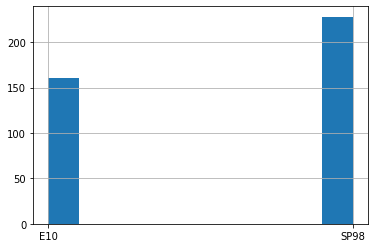

In [55]:
df.gas.hist()